In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
## read the dataset
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


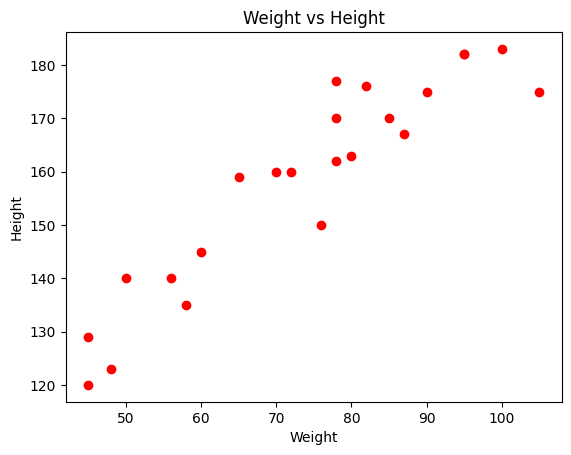

In [11]:

plt.scatter(df['Weight'],df['Height'],color="r")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.show()

In [26]:
## divide my dataset into independent and dependent feature
X = df[["Weight"]] ##independentfeature

y = df["Height"]## dependent feature

In [18]:
#train test split of the dataset
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [20]:
X.shape

(23,)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [24]:
# Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [35]:
X_test = scaler.transform(X_test)

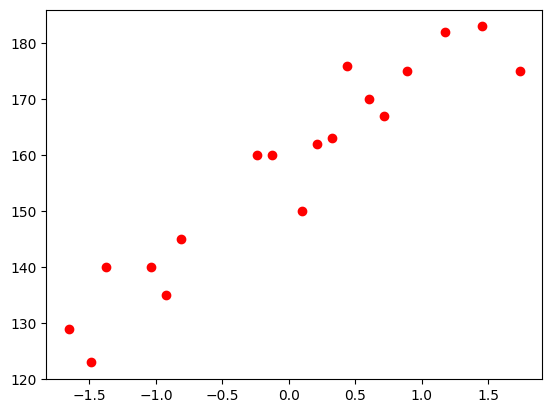

In [36]:
plt.scatter(X_train, y_train, color = 'red')

In [37]:
### train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [38]:
regressor = LinearRegression()

In [39]:
regressor.fit(X_train,y_train)

LinearRegression()

In [42]:
print("The slope or coefficient of weight is " ,regressor.coef_)
print("The intercept is " ,regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
The intercept is  157.5


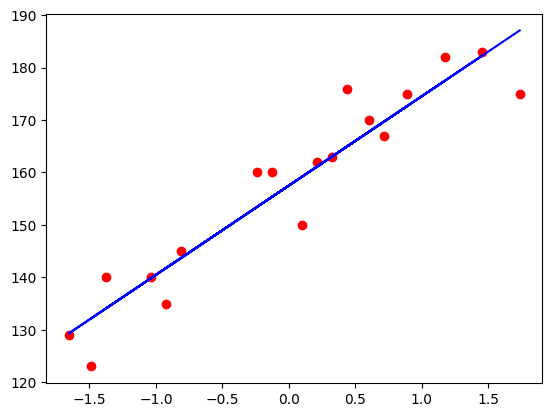

In [43]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# prediction of train data
1. predicted height output= intercept+coef_(Weight)
2. y_pred_train = 157.5 +17.03(X_train)

# prediction of test data
1. predicted height output= intercept+coef_(Weights)
2. y_pred_test=157.5+17.03(X_test)

In [46]:
y_pred_test = regressor.predict(X_test)

In [48]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

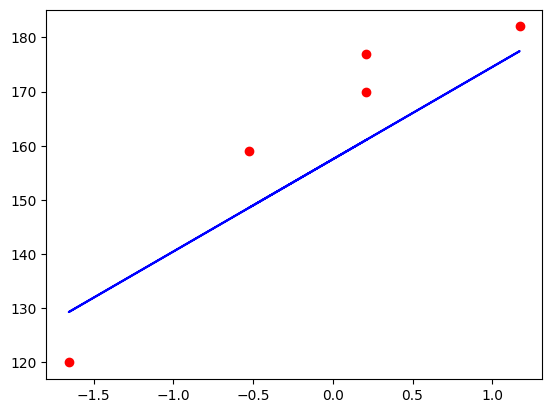

In [49]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

##performance metrics

##  MSE,MAE,RMSE

# R square and adjusted R square

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [51]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)

MSE 109.77592599051664
MAE 9.822657814519232
RMSE 10.477400726827081


# R square

 formula

 R^2 = 1-SSR/SST

 R^2 = coefficient of frtermination SSR = sum of squares of residuals SST = total sum of squares

In [52]:
from sklearn.metrics import r2_score

In [53]:
score = r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


# adjusted R Square

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

In [54]:
## display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [55]:
regressor

LinearRegression()

In [56]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [58]:
scaled_weight[0]

array([0.32350772])

In [59]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


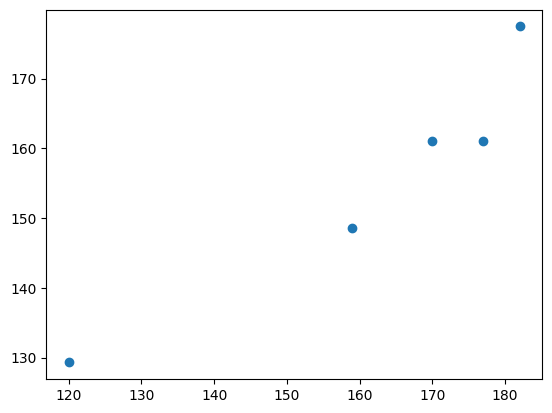

In [60]:
#### Assumption

## plot a scatter for the prediction
plt.scatter(y_test,y_pred_test)

In [61]:
## Residuals
residuals = y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<ipython-input-63-a5b51fed37ab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

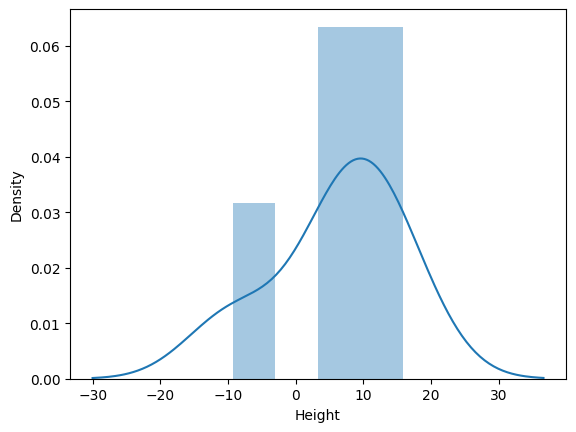

In [63]:
## plot this residuals
sns.distplot(residuals,kde=True)

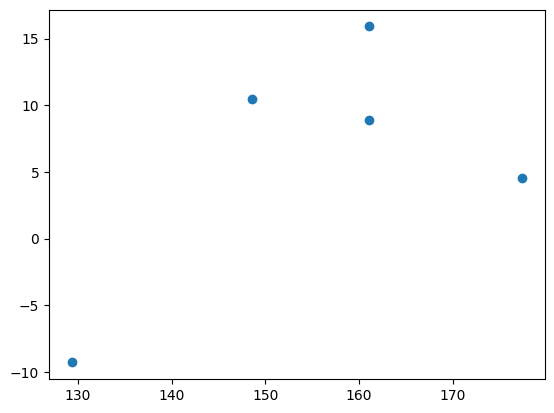

In [64]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)